In [1]:
import pandas as pd
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data from CSV
data = pd.read_csv("C:/Users/huawei/Desktop/Nova_Financial_Solutions/Data/raw_analyst_ratings.csv")


In [3]:
# Display the first few rows of the dataset
print(data.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [4]:
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')


In [5]:
# Determine the minimum and maximum dates in the dataset
min_date = data['date'].min()
max_date = data['date'].max()

print("Date Range: {} - {}".format(min_date, max_date))

Date Range: 2011-04-27 21:01:48-04:00 - 2020-06-11 17:12:35-04:00


In [6]:
# Define the stock symbol let's use A 
stock_symbol = 'A' 

# Fetch stock data using yfinance
stock_data = yf.download(stock_symbol, start=min_date, end=max_date)

# Display the stock data
print(stock_data.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2011-04-28  35.650928  36.151646  35.515022  35.994278  32.349854  3151511
2011-04-29  35.979973  36.251789  35.643776  35.701000  32.086266  3312561
2011-05-02  35.944206  36.309013  35.779686  36.080112  32.426991  3657867
2011-05-03  36.108727  36.251789  35.836910  36.194565  32.529854  3154307
2011-05-04  36.165951  36.273247  35.150215  35.407726  31.822689  5215239


In [7]:
# Calculate daily returns
stock_data['Returns'] = stock_data['Adj Close'].pct_change()

# Calculate volatility
volatility = stock_data['Returns'].std()

print("Volatility: {}".format(volatility))

Volatility: 0.018143451047873727


In [8]:
# Select another variable from the dataset
another_variable = data['stock']

# Calculate correlation coefficient
correlation_coefficient = stock_data['Adj Close'].corr(another_variable)

print("Correlation Coefficient: {}".format(correlation_coefficient))

Correlation Coefficient: nan


In [9]:
# Calculate average daily return
average_daily_return = stock_data['Returns'].mean()

# Calculate risk metrics
risk_metrics = stock_data['Returns'].describe()

print("Average Daily Return: {}".format(average_daily_return))
print("Risk Metrics:\n{}".format(risk_metrics))

Average Daily Return: 0.00057503665744089
Risk Metrics:
count    2295.000000
mean        0.000575
std         0.018143
min        -0.110139
25%        -0.007637
50%         0.000744
75%         0.009751
max         0.117631
Name: Returns, dtype: float64


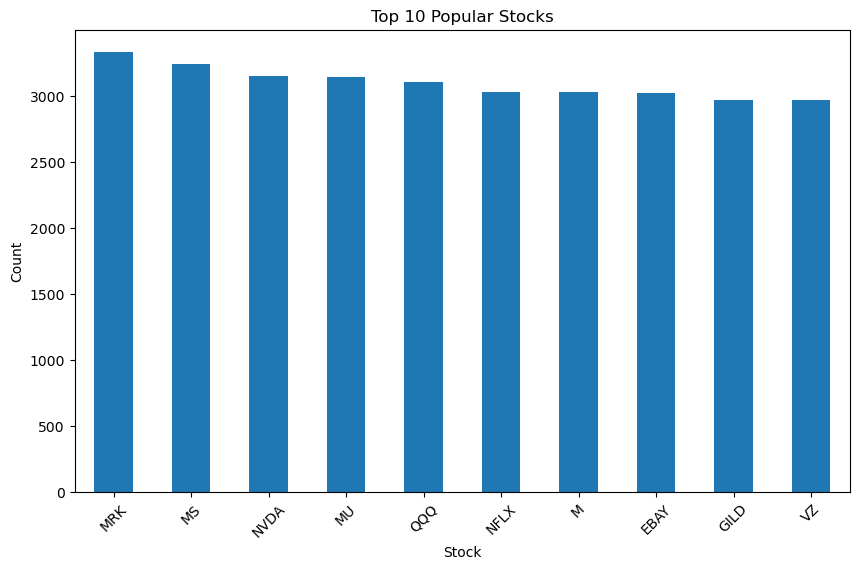

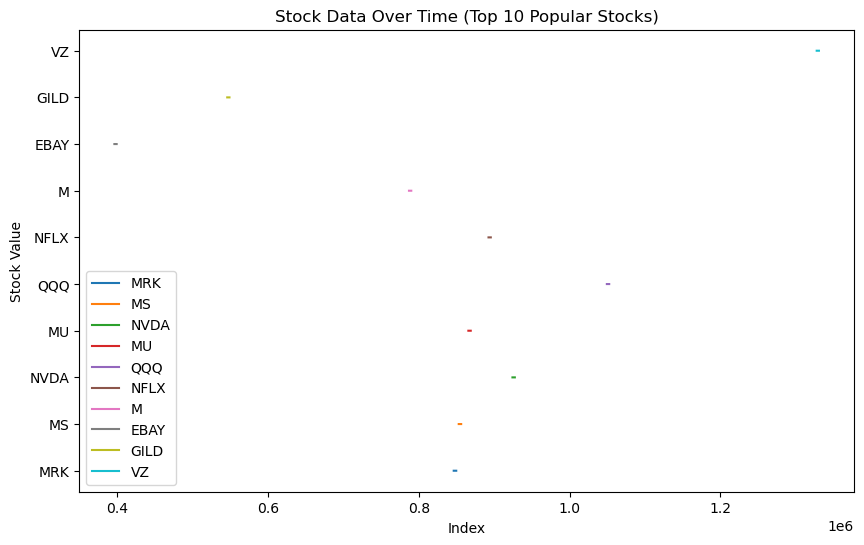

In [21]:

# Count the occurrences of each stock
stock_counts = stock_data.value_counts()

# Select the top 10 popular stocks
top_10_stocks = stock_counts[:10]

# Bar chart
plt.figure(figsize=(10, 6))
top_10_stocks.plot(kind='bar')
plt.title('Top 10 Popular Stocks')
plt.xlabel('Stock')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Line chart
plt.figure(figsize=(10, 6))

for stock in top_10_stocks.index:
    stock_values = stock_data[data['stock'] == stock]
    plt.plot(stock_values, label=stock)

plt.title('Stock Data Over Time (Top 10 Popular Stocks)')
plt.xlabel('Index')
plt.ylabel('Stock Value')
plt.legend()
plt.show()

Average Daily Return: nan
Standard Deviation of Returns: nan
Annualized Return: nan
Annualized Volatility: nan


ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2020-06-05 10:30:54-0400', tz='UTC-04:00'),
       Timestamp('2020-06-03 10:45:20-0400', tz='UTC-04:00'),
       Timestamp('2020-05-26 04:30:07-0400', tz='UTC-04:00'), ..., NaT,
       NaT, NaT], dtype=object)

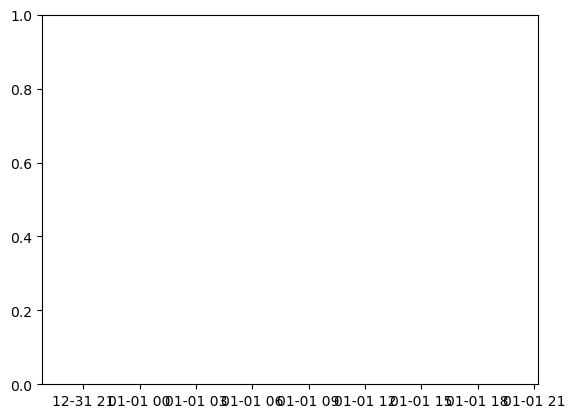

In [14]:

import numpy as np
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], utc=True)
# Convert the 'stock' column to numeric
df['stock'] = pd.to_numeric(df['stock'], errors='coerce')
# Calculate the daily returns
df['returns'] = df['stock'].diff()
# Calculate the average daily return
avg_return = df['returns'].mean()
# Calculate the standard deviation of returns
std_return = df['returns'].std()
# Calculate the annualized return
annual_return = avg_return * 252
# Calculate the annualized volatility (standard deviation)
annual_volatility = std_return * np.sqrt(252)
# Print the results
print('Average Daily Return:', avg_return)
print('Standard Deviation of Returns:', std_return)
print('Annualized Return:', annual_return)
print('Annualized Volatility:', annual_volatility)

# Plot the returns over time
plt.plot(data['date'], data['returns'])
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Returns Over Time')
plt.show()